In [46]:
!pip install graphviz
# !conda install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [49]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [50]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
# iris_df

### 와인 데이터

In [51]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
# wine_df

### 유방암 데이터

In [52]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
# cancer_df

## Regression 데이터

### 보스턴 주택 가격 데이터

In [53]:
boston = load_boston()

In [54]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
# boston_df

### 당뇨병 데이터

In [55]:
diabetes = load_diabetes()

In [56]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
# diabetes_df

## 분류 - `DecisionTreeClassifier()`
- https://scikit-learn.org/stable/modules/tree.html
- `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
- 두개의 배열 x, y를 입력 받음
  - x는 [n_samples, n_features] 크기의 데이터 특성 배열
  - y는 [n_samples] 크기의 정답 배열

In [57]:
x = [[0, 0], [1, 1]]
y = [0, 1]

model = tree.DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [58]:
model.predict([[2., 2.]])

array([1])

In [59]:
model.predict_proba([[2., 2.]])

array([[0., 1.]])

In [60]:
r = tree.export_text(decision_tree=model,
                     feature_names=["X_1", "X_2"])
print(r)

|--- X_1 <= 0.50
|   |--- class: 0
|--- X_1 >  0.50
|   |--- class: 1



[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

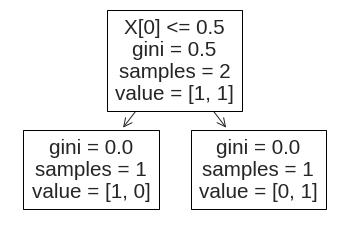

In [61]:
tree.plot_tree(model)

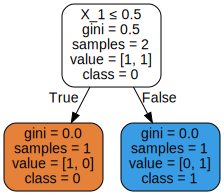

In [62]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = ["X_1", "X_2"],
                                class_names = ["0", "1"],
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 붓꽃 데이터 학습

#### 교차검증

#### StandardScaler를 용해 전처리 여부에 영향을 받는지 확인해 보자

##### 전처리 없이 학습

In [63]:
model = tree.DecisionTreeClassifier()

In [64]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y=iris.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [65]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeClassifier()
)

In [66]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y=iris.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

#### 학습된 결정 트리 시각화

In [67]:
model = tree.DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [68]:
r = tree.export_text(decision_tree=model,
                     feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

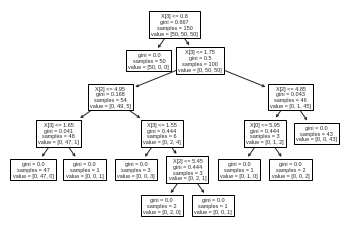

In [69]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [70]:
# https://graphviz.readthedocs.io/en/stable/examples.html

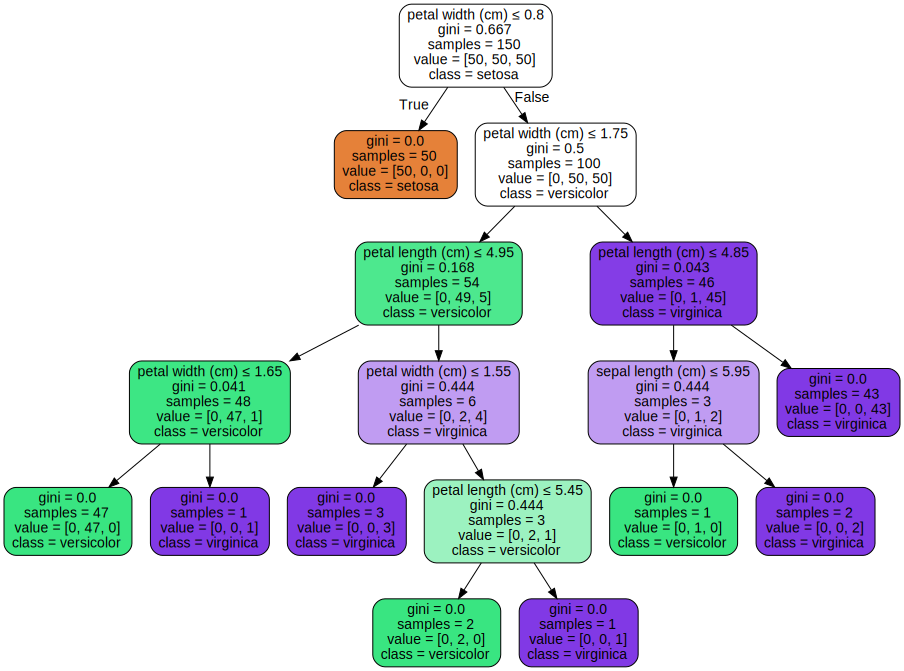

In [71]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [72]:
n_classes = 3
plot_colors = 'ryb'
plot_step=.02

##### 결정 경계 시각화

(0.0, 7.88, -0.9, 3.4800000000000044)

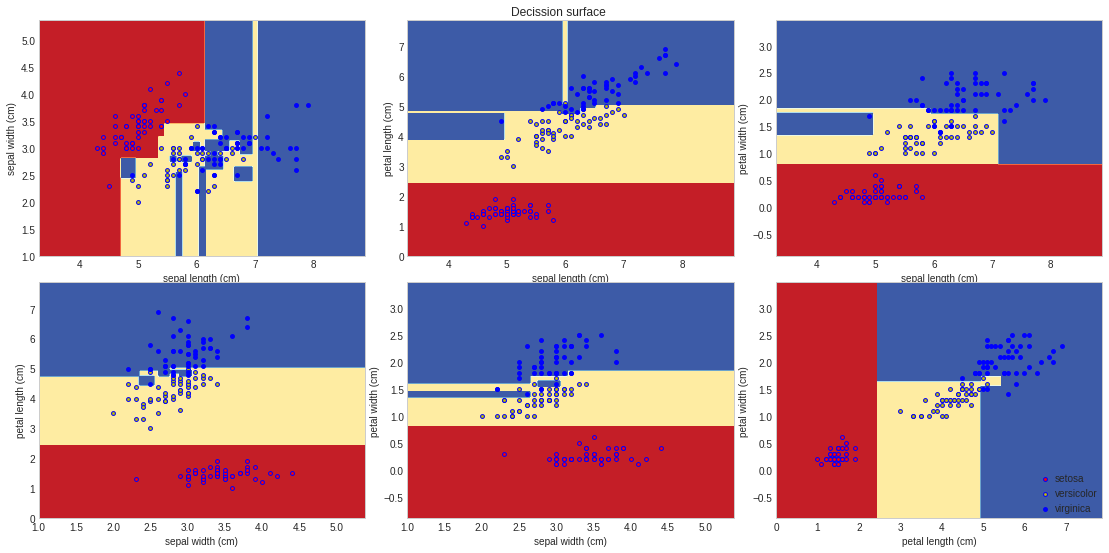

In [73]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### max_depth 변화에 따른 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

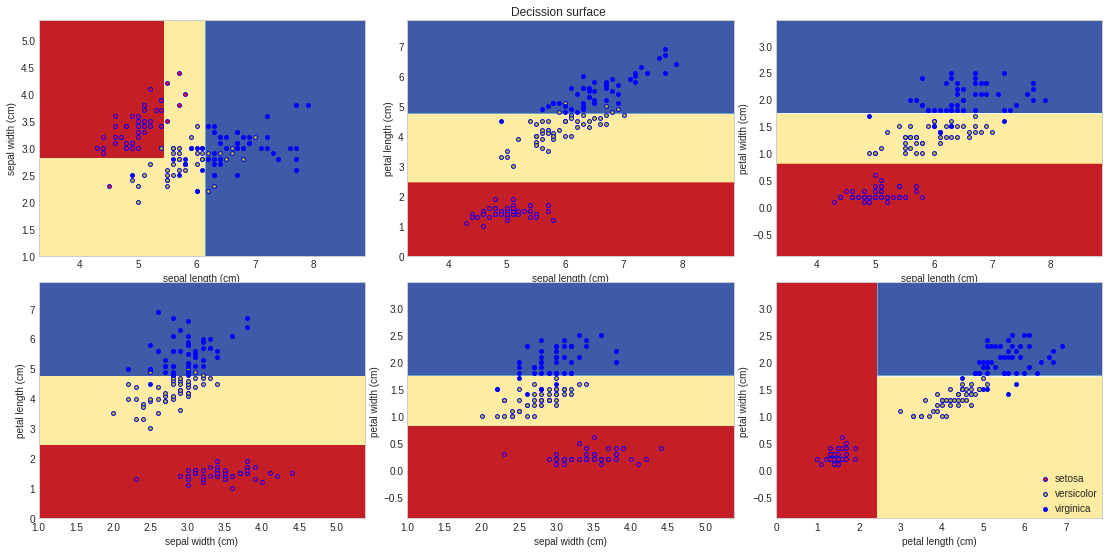

In [74]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier(max_depth=2)
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 와인 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [75]:
model = tree.DecisionTreeClassifier()

cross_val_score(estimator=model,
                cv=5,
                X=wine.data, y=wine.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.94444444, 0.75      , 0.91666667, 0.91428571, 0.85714286])

##### 전처리 후 학습

In [76]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeClassifier()
)

cross_val_score(estimator=model,
                cv=5,
                X=wine.data, y=wine.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.94444444, 0.83333333, 0.91666667, 0.91428571, 0.85714286])

#### 학습된 결정 트리 시각화

In [77]:
model = tree.DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [78]:
r = tree.export_text(decision_tree=model,
                     feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- color_intensity <= 5.82
|   |   |   |   |--- class: 1
|   |   |   |--- color_intensity >  5.82
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- alcohol <= 13.36
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- alcohol >  13.36
|   |   |   |   |   |--- class: 1
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- hue <= 0.80
|   |   |   |--- class: 2
|   |   |--- hue >  0.80
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50
|   |   |   |--

##### plot_tree를 사용한 시각화

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[9] <= 5.815\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.42105

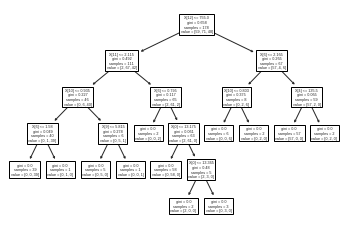

In [79]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

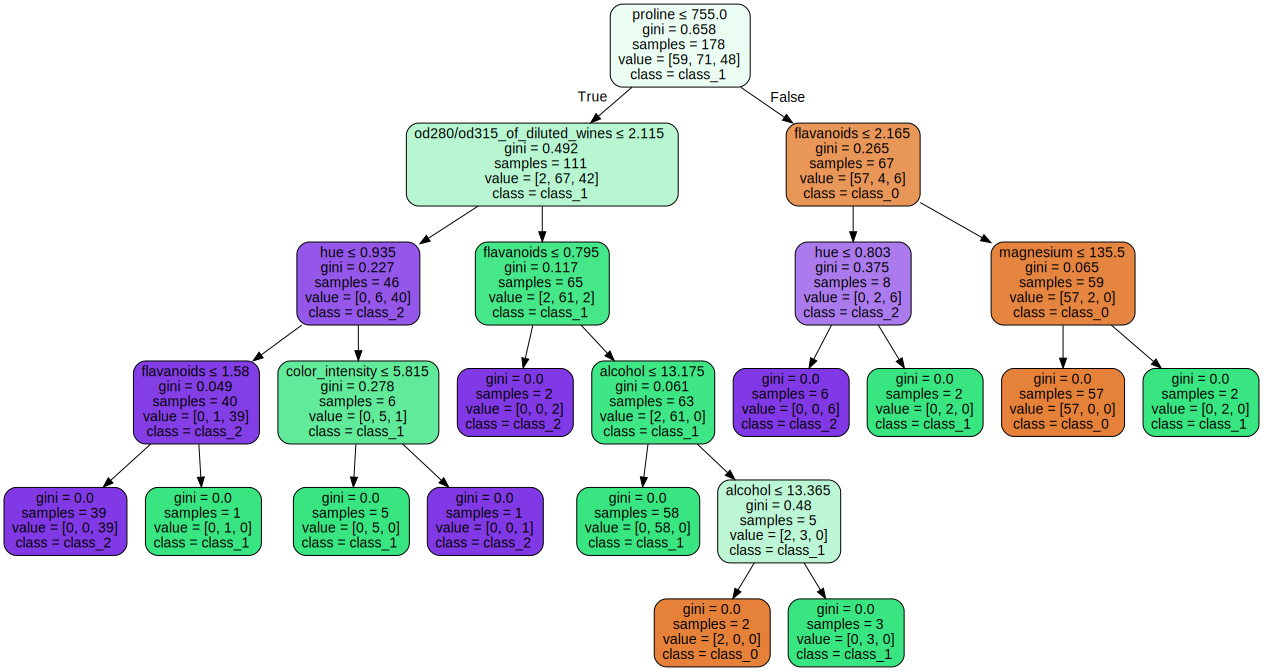

In [80]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = wine.feature_names,
                                class_names = wine.target_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

##### 결정 경계 시각화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

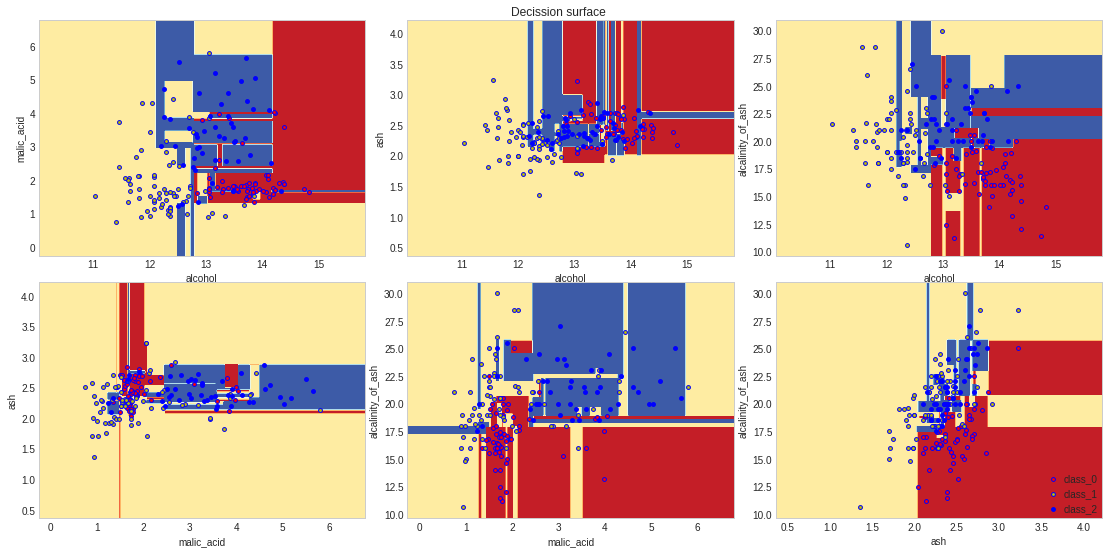

In [81]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = wine.data[:, pair]
  y = wine.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### max_depth 변화에 따른 결정 경계의 변화 확인

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

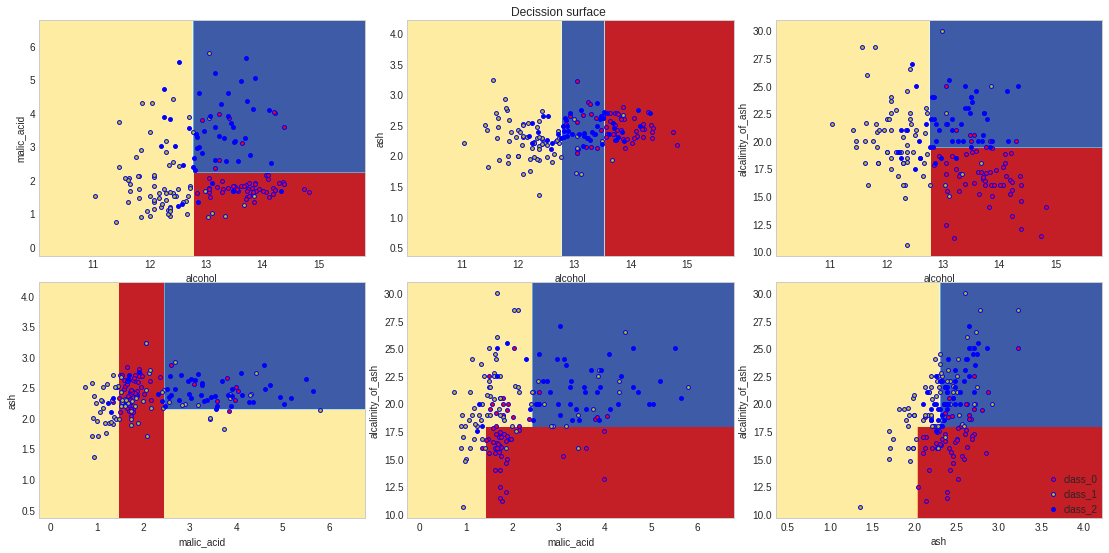

In [82]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = wine.data[:, pair]
  y = wine.target

  model = tree.DecisionTreeClassifier(max_depth=2)
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 유방암 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [83]:
model = tree.DecisionTreeClassifier()

cross_val_score(estimator=model,
                cv=5,
                X=cancer.data, y=cancer.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.9122807 , 0.9122807 , 0.9122807 , 0.95614035, 0.90265487])

##### 전처리 후 학습

In [84]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeClassifier()
)

cross_val_score(estimator=model,
                cv=5,
                X=cancer.data, y=cancer.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.9122807 , 0.90350877, 0.92982456, 0.96491228, 0.89380531])

#### 학습된 결정 트리 시각화

In [85]:
model = tree.DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

In [86]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##### 텍스트를 통한 시각화

In [90]:
r = tree.export_text(decision_tree=model)
                     #feature_names=cancer.feature_names)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_12 <= 6.60
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_1 <= 19.90
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  19.90
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_25 <= 0.08
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_25 >  0.08
|   |   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_10 >  0.42
|   |   |   |   |   |   |--- class: 1
|   |   |

##### plot_tree를 사용한 시각화

[Text(0.625, 0.9375, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.40625, 0.8125, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.234375, 0.6875, 'X[12] <= 6.597\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.203125, 0.5625, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'X[1] <= 19.9\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'X[21] <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.0625, 'gini

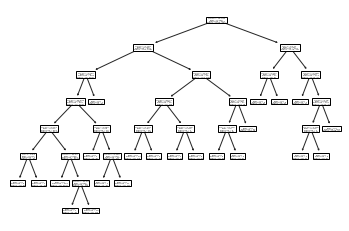

In [88]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

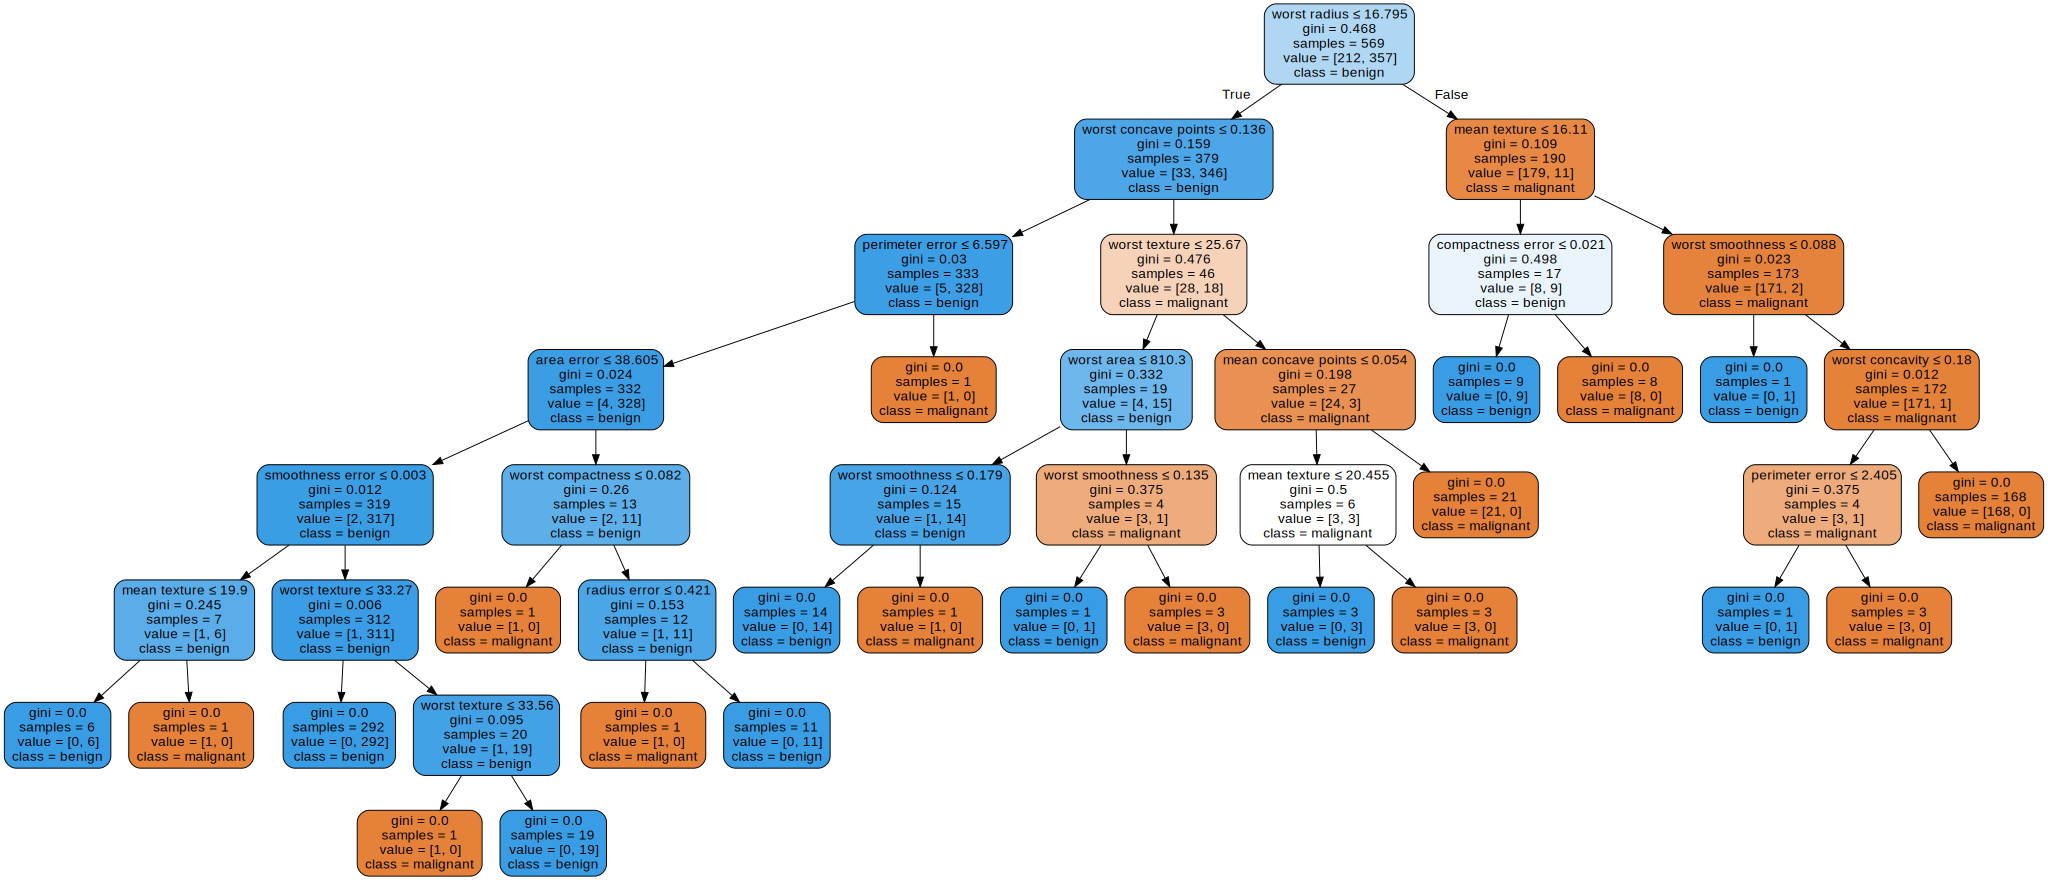

In [89]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = cancer.feature_names,
                                class_names = cancer.target_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 결정 경계 시각화

KeyboardInterrupt: ignored

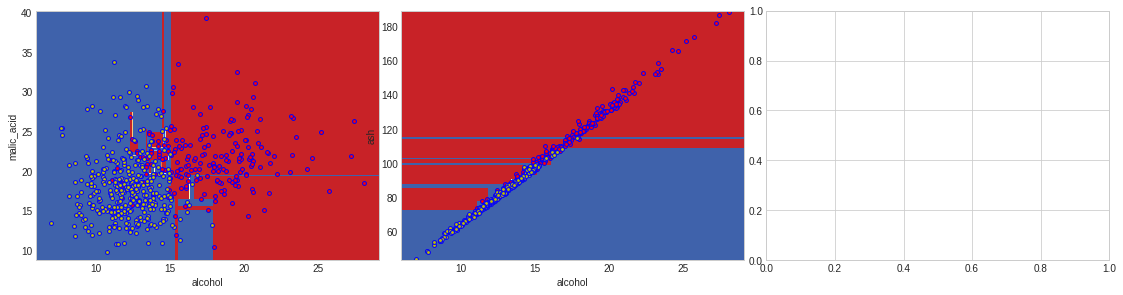

In [43]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = cancer.data[:, pair]
  y = cancer.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

In [ ]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = cancer.data[:, pair]
  y = cancer.target

  model = tree.DecisionTreeClassifier(max_depth=2)
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [91]:
model = tree.DecisionTreeRegressor()

In [92]:
cross_val_score(estimator=model,
                X=boston.data, y = boston.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

array([ 0.66047424,  0.42466388,  0.64180629,  0.42261774, -1.80506587])

##### 전처리 후 학습

In [93]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeRegressor()
)

In [94]:
cross_val_score(estimator=model,
                X=boston.data, y = boston.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

array([ 0.56516937,  0.41441124,  0.66544636,  0.39178772, -1.84727156])

#### 학습된 결정 트리 시각화

In [95]:
model = tree.DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [96]:
print(tree.export_text(model))

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_0 <= 10.59
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.59
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.44
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  3.44
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |--- feature_

##### plot_tree를 사용한 시각화

[Text(0.6788855422506094, 0.975, 'X[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.42240374466834957, 0.925, 'X[12] <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.18680203436919685, 0.875, 'X[7] <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.1051704314647168, 0.825, 'X[0] <= 10.592\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.10331342125116064, 0.775, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.10702744167827298, 0.775, 'squared_error = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.26843363727367686, 0.825, 'X[5] <= 6.543\nsquared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(0.11074146210538532, 0.775, 'X[12] <= 7.57\nsquared_error = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(0.04221796657381616, 0.725, 'X[9] <= 222.5\nsquared_error = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(0.04036095636025998, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(0

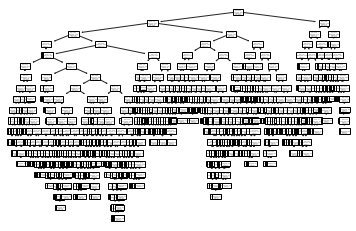

In [97]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

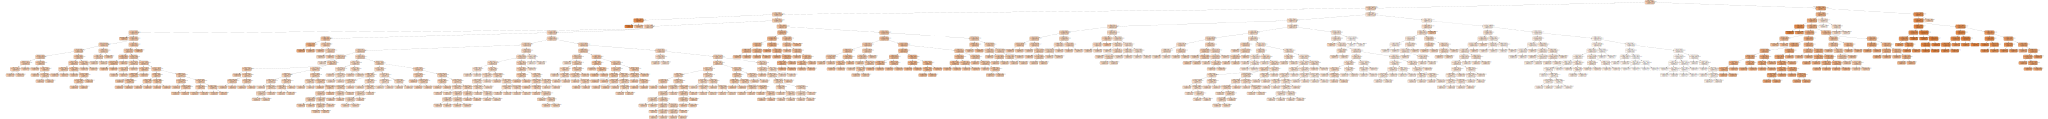

In [98]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = boston.feature_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

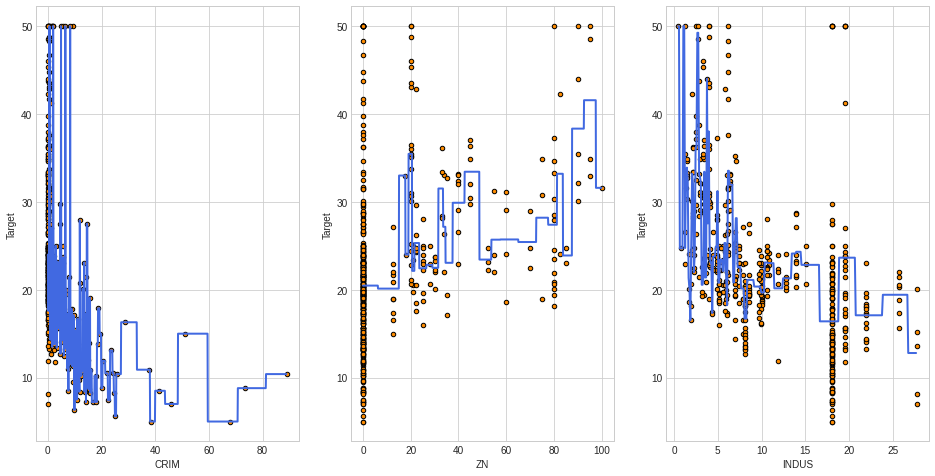

In [99]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  x = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = tree.DecisionTreeRegressor()
  model = model.fit(x, y)

  x_test = np.arange(min(x), max(x), 0.1)[:, np.newaxis]
  predict = model.predict(x_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(x, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(x_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

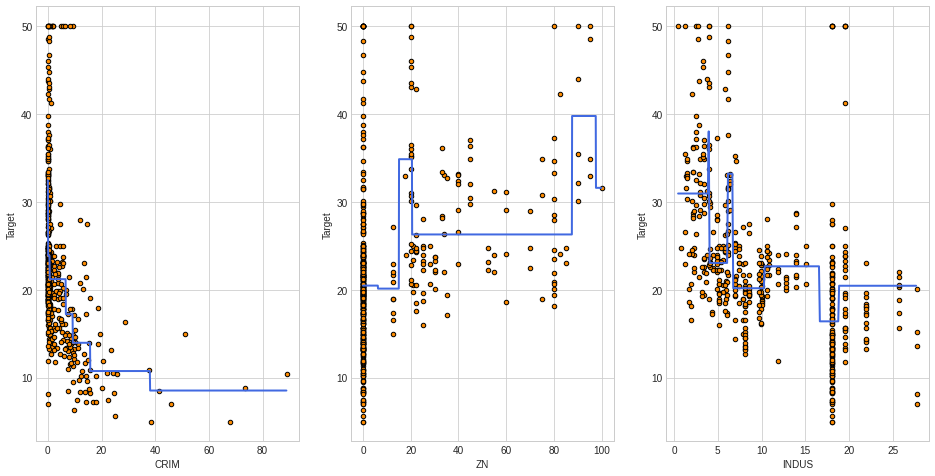

In [100]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  x = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = tree.DecisionTreeRegressor(max_depth=3)
  model = model.fit(x, y)

  x_test = np.arange(min(x), max(x), 0.1)[:, np.newaxis]
  predict = model.predict(x_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(x, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(x_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

##### 전처리 후 학습

#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

##### graphviz를 사용한 시각화

#### 시각화

##### 회귀식 시각화

##### max_depth 변화에 따른 시각화